In [ ]:
-[=]!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 3.8 MB 53.8 MB/s 
     |████████████████████████████████| 503 kB 76.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=e2832714be0c24133a8c174364daa053f1f807f204910bf3217944e12c76605d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
cmdstanpy 1.0.4 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 34.9 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=98cd0d1974f7987200b054a7f0623340bbb3049ced8b90fd77dbd1df7457a984
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2818048/45929032 bytes (6.1%)5316608/45929032 bytes (11.6%)7266304/45929032 bytes (15.8%)9166848/45929032 bytes (20.0%)10985472/45929032 bytes (23.9%)12738560/45929032 bytes (27.7%)14008320/45929032 bytes (30.5%)16392192/45929032 bytes (35.7%)18243584/45929032 bytes (39.7%)20873216/45929032 bytes (45.4%)23920640/45929032 bytes (52.1%)27533312/45929032 bytes (59.9%)3

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)



def window(xmin,ymin,xmax,ymax):
  gl.glColor3f(.5,.3,.7)
  gl.glPointSize(3)
  gl.glBegin(gl.GL_LINES)
  gl.glVertex2f(xmin,-1)
  gl.glVertex2f(xmin,1)

  gl.glVertex2f(xmax,-1)
  gl.glVertex2f(xmax,1)

  gl.glVertex2f(-1,ymin)
  gl.glVertex2f(1,ymin)

  gl.glVertex2f(-1,ymax)
  gl.glVertex2f(1,ymax)
  gl.glEnd()


def calculate_outcode(x1,y1,xmin,ymin,xmax,ymax):
  if x1<xmin:
    bit0="1" 
  else: 
    bit0="0"
  if x1>xmax:
    bit1="1"
  else: 
    bit1="0"
  if y1<ymin:
    bit2="1"
  else: 
    bit2="0"
  if y1>ymax:
    bit3="1"
  else: 
    bit3="0"
  outcode=bit3+bit2+bit1+bit0
  return outcode


def Intersection(oc1,x1, y1, x2, y2,xmin,ymin,xmax,ymax,m):
  index=0
  while index<=len(oc1)-1:
    if index==0 and oc1[index]==str(1):
      x1=x1+(1/m)*(ymax-y1)
      y1=ymax
      
      break

    elif index==1 and oc1[index]==str(1):
      x1=x1+(1/m)*(ymin-y1)
      y1=ymin
      
      break
    elif index==2 and oc1[index]==str(1):

      y1=y1+m*(xmax-x1)
      x1=xmax
      
      break

    elif index==3 and oc1[index]==str(1):
      y1=y1+m*(xmin-x1)
      x1=xmin
      break

    index+=1 
  return x1,y1


def AndOperation(a,b):
    output=""
    if a[0]==str(0) and b[0]==str(0):
        output+=str(0)
    elif a[0]==str(1)and b[0]==str(1):
        output+=str(1)
    else:
        output+=str(0)

    if a[1]==str(0) and b[1]==str(0):
        output+=str(0)
    elif a[1]==str(1) and b[1]==str(1):
        output+=str(1)
    else:
        output+=str(0)

    if a[2]==str(0) and b[2]==str(0):
        output+=str(0)
    elif a[2]==str(1) and b[2]==str(1):
        output+=str(1)
    else:
        output+=str(0)

    if a[3]==str(0) and b[3]==str(0):
        output+=str(0)
    elif a[3]==str(1) and b[3]==str(1):
        output+=str(1)
    else:
        output+=str(0)
    return output


def CohenSutherland(x1, y1, x2, y2,xmin,ymin,xmax,ymax):
  m=(y2-y1)/(x2-x1)
  oc1=calculate_outcode(x1,y1,xmin,ymin,xmax,ymax)
  oc2=calculate_outcode(x2,y2,xmin,ymin,xmax,ymax)
  x=AndOperation(oc1,oc2)
  print(oc1)
  print(oc2)


  while True:
    count=0
    if (oc1=="0000" and oc2=="0000"):
      print ("Line Completely Inside\n"+"output(",str(x1)+","+str(y1)+"),("+str(x2)+","+str(y2)+")")
      gl.glColor3f(0,1,0)
      gl.glPointSize(3)
      gl.glBegin(gl.GL_LINES)
      gl.glVertex2f(x1,y1)
      gl.glVertex2f(x2,y2)
      gl.glEnd()
      break

    elif x!="0000":
      print(" Completely Outside")
      gl.glColor3f(1,0,0)
      gl.glPointSize(3)
      gl.glBegin(gl.GL_LINES)
      gl.glVertex2f(x1,y1)
      gl.glVertex2f(x2,y2)
      gl.glEnd()
      break
    else: 
      if oc1!="0000":
        print("Partially inside")
        if count ==0:
          gl.glColor3f(1,0,0)
        else:
          gl.glColor3f(0,0,1)
        gl.glPointSize(3)
        gl.glBegin(gl.GL_LINES)
        gl.glVertex2f(x1,y1)
        gl.glVertex2f(x2,y2)
        gl.glEnd()
        x1,y1=Intersection(oc1,x1, y1, x2, y2,xmin,ymin,xmax,ymax,m)
        count+=1
        CohenSutherland(x1, y1, x2, y2,xmin,ymin,xmax,ymax)
        break


      else:
        gl.glColor3f(0,0,1)
        gl.glPointSize(3)
        gl.glBegin(gl.GL_LINES)
        gl.glVertex2f(x1,y1)
        gl.glVertex2f(x2,y2)
        gl.glEnd()
        print(x1,y1,x2,y2)
        print(oc2)
        x2,y2=Intersection(oc2,x1, y1, x2, y2,xmin,ymin,xmax,ymax,m)
        print(x1,y1,x2,y2)
        CohenSutherland(x1, y1, x2, y2,xmin,ymin,xmax,ymax)
        break

        
        

 

window(-.5,-.5,.5,.5)

print("Completely inside line:")
CohenSutherland(0.2,0.4,-0.1,-0.2,-.5,-.5,.5,.5)

print(" partyially inside line:")
CohenSutherland(0.4,0.3,-0.9,-0.8,-.5,-.5,.5,.5)

print("Completely outside line:")
CohenSutherland(1,0.4,0.3,-1,-.5,-.5,.5,.5)





Completely inside line:
0000
0000
Line Completely Inside
output( 0.2,0.4),(-0.1,-0.2)
 partyially inside line:
0000
0101
0.4 0.3 -0.9 -0.8
0101
0.4 0.3 -0.5454545454545455 -0.5
0000
0001
0.4 0.3 -0.5454545454545455 -0.5
0001
0.4 0.3 -0.5 -0.4615384615384615
0000
0000
Line Completely Inside
output( 0.4,0.3),(-0.5,-0.4615384615384615)
Completely outside line:
0010
0100
Partially inside
0100
0100
 Completely Outside



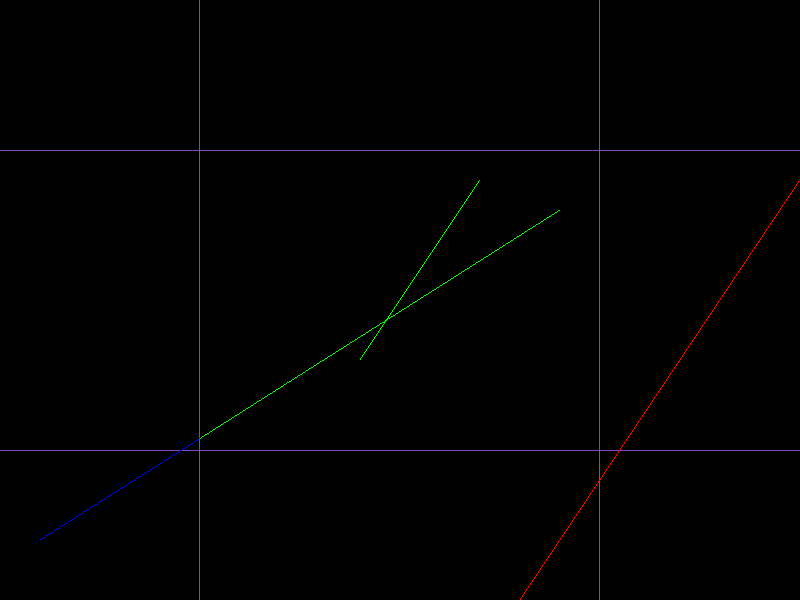

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)